In [1]:
import pickle
with open('filename.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [2]:
with open('labels.pickle', 'rb') as handle:
    target = pickle.load(handle)

In [5]:
import numpy as np

data=np.asarray(data, dtype = np.float64, 
                        order ='C')

In [4]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN, Flatten,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score

# Generate a dataset of 20 samples of (149,47) fictive data
# data = np.random.rand(20, 149, 47)
# target = np.random.randint(0, 2, size=(20,))

# Define the Scikit-learn models to be tested
scikit_models = [
    ('Linear Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC())
]

# Loop over Scikit-learn models, train the model, and evaluate the model
for name, model in scikit_models:
    model.fit(data.reshape(98, -1), target)
    y_pred = model.predict(data.reshape(98, -1))
    acc = accuracy_score(target, y_pred)
    print(name, acc)

# Define the Keras models to be tested
def create_rnn():
    model = Sequential([SimpleRNN(32), Dense(1, activation='sigmoid')])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_gru():
    model = Sequential([GRU(32), Dense(1, activation='sigmoid')])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_lstm():
    model = Sequential([LSTM(32), Dense(1, activation='sigmoid')])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_dnn():
    model = Sequential([Flatten(input_shape=(149, 47)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_models = [
    ('RNN', KerasClassifier(build_fn=create_rnn, epochs=10, verbose=0)),
    ('GRU', KerasClassifier(build_fn=create_gru, epochs=10, verbose=0)),
    ('LSTM', KerasClassifier(build_fn=create_lstm, epochs=10, verbose=0)),
    ('DNN', KerasClassifier(build_fn=create_dnn, epochs=10, verbose=0))
]

# Loop over Keras models, train the model, and evaluate the model
for name, model in keras_models:
    model.fit(data, target)
    y_pred = (model.predict(data) > 0.5).astype("int32")
    acc = accuracy_score(target, y_pred)
    print(name, acc)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear Regression 1.0
Decision Tree 1.0
SVM 0.8979591836734694


<ipython-input-43-af5363848e22>:53: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('RNN', KerasClassifier(build_fn=create_rnn, epochs=10, verbose=0)),
<ipython-input-43-af5363848e22>:54: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('GRU', KerasClassifier(build_fn=create_gru, epochs=10, verbose=0)),
<ipython-input-43-af5363848e22>:55: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('LSTM', KerasClassifier(build_fn=create_lstm, epochs=10, verbose=0)),
<ipython-input-43-af5363848e22>:56: DeprecationWarning: KerasClassifier is deprecated, use Sci-Ker

4/4 [==============================] - 0s 11ms/step
RNN 0.6938775510204082


4/4 [==============================] - 1s 25ms/step
GRU 0.8367346938775511
4/4 [==============================] - 1s 20ms/step
LSTM 0.7755102040816326
4/4 [==============================] - 0s 4ms/step
DNN 1.0


In [ ]:
# test with more complex models 

def create_rnn():
    model = Sequential([
        SimpleRNN(64, return_sequences=True),
        Dropout(0.2),
        SimpleRNN(32),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_gru():
    model = Sequential([
        GRU(64, return_sequences=True),
        Dropout(0.2),
        GRU(32),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_lstm():
    model = Sequential([
        LSTM(64, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_dnn():
    model = Sequential([
        Flatten(input_shape=(149, 47)),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_models = [
    ('RNN', KerasClassifier(build_fn=create_rnn, epochs=10, verbose=0)),
    ('GRU', KerasClassifier(build_fn=create_gru, epochs=10, verbose=0)),
    ('LSTM', KerasClassifier(build_fn=create_lstm, epochs=10, verbose=0)),
    ('DNN', KerasClassifier(build_fn=create_dnn, epochs=10, verbose=0))
]

# Loop over Keras models, train the model, and evaluate the model
for name, model in keras_models:
    model.fit(data, target)
    y_pred = (model.predict(data) > 0.5).astype("int32")
    acc = accuracy_score(target, y_pred)
    print(name, acc)


<ipython-input-44-e505dcd6c917>:47: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('RNN', KerasClassifier(build_fn=create_rnn, epochs=10, verbose=0)),
<ipython-input-44-e505dcd6c917>:48: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('GRU', KerasClassifier(build_fn=create_gru, epochs=10, verbose=0)),
<ipython-input-44-e505dcd6c917>:49: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('LSTM', KerasClassifier(build_fn=create_lstm, epochs=10, verbose=0)),
<ipython-input-44-e505dcd6c917>:50: DeprecationWarning: KerasClassifier is deprecated, use Sci-Ker

4/4 [==============================] - 0s 19ms/step
RNN 0.8061224489795918
4/4 [==============================] - 1s 54ms/step
GRU 0.9489795918367347
4/4 [==============================] - 1s 31ms/step
LSTM 0.9387755102040817
4/4 [==============================] - 0s 14ms/step
DNN 0.9285714285714286


In [ ]:
# logreg = LogisticRegression(max_iter=1000)

# param_grid = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# }

# grid_search = GridSearchCV(logreg, param_grid, cv=5)
# grid_search.fit(data, target)
# logreg_best = grid_search.best_estimator_


# dt = DecisionTreeClassifier()

# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# }

# grid_search = GridSearchCV(dt, param_grid, cv=5)
# grid_search.fit(data, target)
# dt_best = grid_search.best_estimator_


# svm = SVC(probability=True)

# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree': [2, 3, 4, 5, 6],
#     'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
# }

# grid_search = GridSearchCV(svm, param_grid, cv=5)
# grid_search.fit(data, target)
# svm_best = grid_search.best_estimator_


## Split into Train/Test

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (78, 149, 47)
Testing set shape: (20, 149, 47)


In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN, Flatten,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score

# Generate a dataset of 20 samples of (149,47) fictive data
# data = np.random.rand(20, 149, 47)
# target = np.random.randint(0, 2, size=(20,))

# Define the Scikit-learn models to be tested
scikit_models = [
    ('Linear Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC())
]

# Loop over Scikit-learn models, train the model, and evaluate the model
for name, model in scikit_models:
    model.fit(X_train.reshape(78, -1), y_train)
    y_pred = model.predict(X_train.reshape(78, -1))
    acc = accuracy_score(y_train, y_pred)
    print(name, acc)

# Define the Keras models to be tested
def create_rnn():
    model = Sequential([SimpleRNN(32), Dense(1, activation='sigmoid')])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_gru():
    model = Sequential([GRU(32), Dense(1, activation='sigmoid')])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_lstm():
    model = Sequential([LSTM(32), Dense(1, activation='sigmoid')])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_dnn():
    model = Sequential([Flatten(input_shape=(149, 47)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_models = [
    ('RNN', KerasClassifier(build_fn=create_rnn, epochs=10, verbose=0)),
    ('GRU', KerasClassifier(build_fn=create_gru, epochs=10, verbose=0)),
    ('LSTM', KerasClassifier(build_fn=create_lstm, epochs=10, verbose=0)),
    ('DNN', KerasClassifier(build_fn=create_dnn, epochs=10, verbose=0))
]

# Loop over Keras models, train the model, and evaluate the model
for name, model in keras_models:
    model.fit(X_train, y_train)
    y_pred = (model.predict(X_train) > 0.5).astype("int32")
    acc = accuracy_score(y_train, y_pred)
    print(name, acc)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-7-e6dbcb394f0e>:53: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('RNN', KerasClassifier(build_fn=create_rnn, epochs=10, verbose=0)),
<ipython-input-7-e6dbcb394f0e>:54: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stabl

Linear Regression 1.0
Decision Tree 1.0
SVM 0.9102564102564102
3/3 [==============================] - 0s 11ms/step
RNN 0.8205128205128205
3/3 [==============================] - 1s 16ms/step
GRU 0.7435897435897436
3/3 [==============================] - 0s 17ms/step
LSTM 0.8076923076923077
3/3 [==============================] - 0s 10ms/step
DNN 0.9871794871794872


Linear Regression 0.6
[[5 1]
 [7 7]]


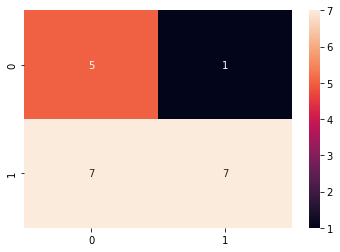

Decision Tree 0.7
[[ 4  2]
 [ 4 10]]


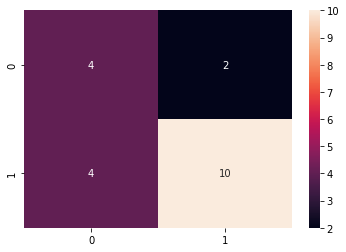

SVM 0.55
[[5 1]
 [8 6]]


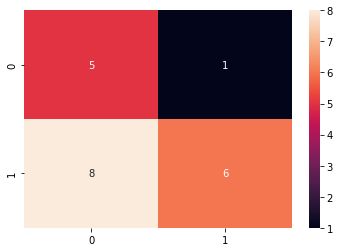

1/1 [==============================] - 0s 38ms/step
RNN 0.35
[[ 4  2]
 [11  3]]


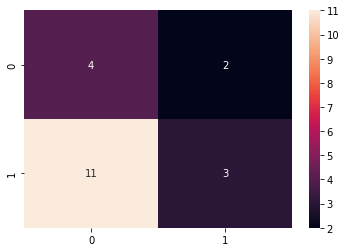

1/1 [==============================] - 0s 41ms/step
GRU 0.25
[[ 3  3]
 [12  2]]


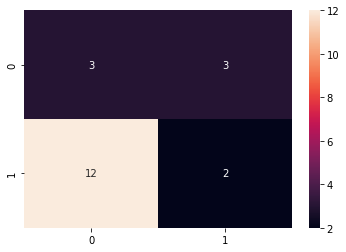

1/1 [==============================] - 0s 43ms/step
LSTM 0.65
[[ 3  3]
 [ 4 10]]


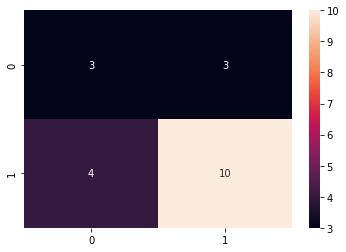

1/1 [==============================] - 0s 28ms/step
DNN 0.7
[[5 1]
 [5 9]]


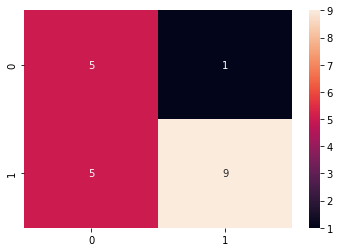

In [16]:
#testing:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

for name, model in scikit_models:
    y_pred = model.predict(X_test.reshape(20, -1))
    acc = accuracy_score(y_test, y_pred)
    print(name, acc)
    result = confusion_matrix(y_test, y_pred)
    sns.heatmap(result, annot=True)
    plt.show()




for name, model in keras_models:
    #model.fit(data, target)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    acc = accuracy_score(y_test, y_pred)
    print(name, acc)
    result = confusion_matrix(y_test, y_pred)
    sns.heatmap(result, annot=True)
    plt.show()

In [21]:
# test with more complex models 

def create_rnn():
    model = Sequential([
        SimpleRNN(64, return_sequences=True),
        Dropout(0.2),
        SimpleRNN(32),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_gru():
    model = Sequential([
        GRU(64, return_sequences=True),
        Dropout(0.2),
        GRU(32),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_lstm():
    model = Sequential([
        LSTM(64, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_dnn():
    model = Sequential([
        Flatten(input_shape=(149, 47)),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_models = [
    ('RNN', KerasClassifier(build_fn=create_rnn, epochs=10, verbose=0)),
    ('GRU', KerasClassifier(build_fn=create_gru, epochs=10, verbose=0)),
    ('LSTM', KerasClassifier(build_fn=create_lstm, epochs=10, verbose=0)),
    ('DNN', KerasClassifier(build_fn=create_dnn, epochs=10, verbose=0))
]

# Loop over Keras models, train the model, and evaluate the model
for name, model in keras_models:
    model.fit(X_train, y_train)
    y_pred = (model.predict(X_train) > 0.5).astype("int32")
    acc = accuracy_score(y_train, y_pred)
    print(name, acc)
    


<ipython-input-21-95c797b89e2d>:47: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('RNN', KerasClassifier(build_fn=create_rnn, epochs=10, verbose=0)),
<ipython-input-21-95c797b89e2d>:48: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('GRU', KerasClassifier(build_fn=create_gru, epochs=10, verbose=0)),
<ipython-input-21-95c797b89e2d>:49: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('LSTM', KerasClassifier(build_fn=create_lstm, epochs=10, verbose=0)),
<ipython-input-21-95c797b89e2d>:50: DeprecationWarning: KerasClassifier is deprecated, use Sci-Ker

3/3 [==============================] - 0s 23ms/step
RNN 0.8974358974358975
3/3 [==============================] - 1s 40ms/step
GRU 0.9615384615384616
3/3 [==============================] - 1s 38ms/step
LSTM 0.9487179487179487
3/3 [==============================] - 0s 14ms/step
DNN 0.9871794871794872


1/1 [==============================] - 0s 55ms/step
RNN 0.65


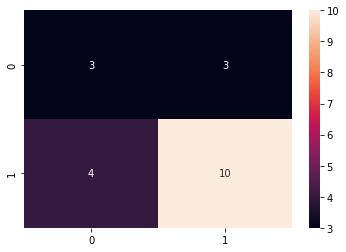

1/1 [==============================] - 0s 53ms/step
GRU 0.7


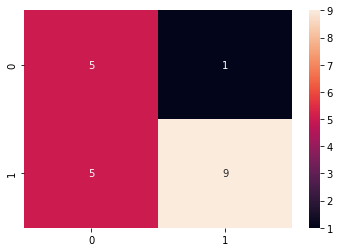

1/1 [==============================] - 0s 53ms/step
LSTM 0.8


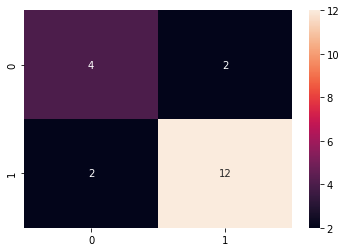

1/1 [==============================] - 0s 25ms/step
DNN 0.7


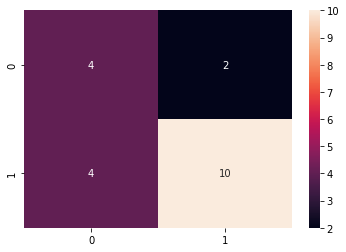

In [22]:
for name, model in keras_models:
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    acc = accuracy_score(y_test, y_pred)
    print(name, acc)
    result = confusion_matrix(y_test, y_pred)
    sns.heatmap(result, annot=True)
    plt.show()

## Kfold

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN, Flatten,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Generate a dataset of 20 samples of (149,47) fictive data
# data = np.random.rand(20, 149, 47)
# target = np.random.randint(0, 2, size=(20,))

# Define the Scikit-learn models to be tested
scikit_models = [
    ('Linear Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC()),
    ('RandomForest', RandomForestClassifier())
]

# Loop over Scikit-learn models, train the model, and evaluate the model using 10-fold cross-validation
for name, model in scikit_models:
    scores = cross_val_score(model, data.reshape(98, -1), target, cv=10)
    print(name,scores)
    print(name, "Accuracy:", scores.mean())


# Loop over Scikit-learn models, train the model, and evaluate the model
# for name, model in scikit_models:
#     model.fit(data.reshape(98, -1), target)
#     y_pred = model.predict(data.reshape(98, -1))
#     acc = accuracy_score(target, y_pred)
#     print(name, acc)

# Define the Keras models to be tested
def create_rnn():
    model = Sequential([SimpleRNN(32), Dense(1, activation='sigmoid')])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_gru():
    model = Sequential([GRU(32), Dense(1, activation='sigmoid')])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_lstm():
    model = Sequential([LSTM(32), Dense(1, activation='sigmoid')])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_dnn():
    model = Sequential([Flatten(input_shape=(149, 47)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_models = [
    ('RNN', KerasClassifier(build_fn=create_rnn, epochs=10, verbose=0)),
    ('GRU', KerasClassifier(build_fn=create_gru, epochs=10, verbose=0)),
    ('LSTM', KerasClassifier(build_fn=create_lstm, epochs=10, verbose=0)),
    ('DNN', KerasClassifier(build_fn=create_dnn, epochs=10, verbose=0))
]


# Loop over Keras models, train the model, and evaluate the model using 10-fold cross-validation
for name, model in keras_models:
    scores = cross_val_score(model, data, target, cv=10)
    print(name,scores)
    print(name, "Accuracy:", scores.mean())

In [32]:
# test with more complex models 

def create_rnn():
    model = Sequential([
        SimpleRNN(64, return_sequences=True),
        Dropout(0.2),
        SimpleRNN(32),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_gru():
    model = Sequential([
        GRU(64, return_sequences=True),
        Dropout(0.2),
        GRU(32),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_lstm():
    model = Sequential([
        LSTM(64, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_dnn():
    model = Sequential([
        Flatten(input_shape=(149, 47)),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_models = [
    ('RNN', KerasClassifier(build_fn=create_rnn, epochs=10, verbose=0)),
    ('GRU', KerasClassifier(build_fn=create_gru, epochs=10, verbose=0)),
    ('LSTM', KerasClassifier(build_fn=create_lstm, epochs=10, verbose=0)),
    ('DNN', KerasClassifier(build_fn=create_dnn, epochs=10, verbose=0))
]

# # Loop over Keras models, train the model, and evaluate the model
# for name, model in keras_models:
#     model.fit(data, target)
#     y_pred = (model.predict(data) > 0.5).astype("int32")
#     acc = accuracy_score(target, y_pred)
#     print(name, acc)
    
# Loop over Keras models, train the model, and evaluate the model using 10-fold cross-validation
for name, model in keras_models:
    scores = cross_val_score(model, data, target, cv=10)
    print(name,scores)
    print(name, "Accuracy:", scores.mean())

<ipython-input-32-4f9e0a387059>:47: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('RNN', KerasClassifier(build_fn=create_rnn, epochs=10, verbose=0)),
<ipython-input-32-4f9e0a387059>:48: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('GRU', KerasClassifier(build_fn=create_gru, epochs=10, verbose=0)),
<ipython-input-32-4f9e0a387059>:49: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('LSTM', KerasClassifier(build_fn=create_lstm, epochs=10, verbose=0)),
<ipython-input-32-4f9e0a387059>:50: DeprecationWarning: KerasClassifier is deprecated, use Sci-Ker

RNN [0.5        0.80000001 0.89999998 0.69999999 0.80000001 0.60000002
 1.         0.89999998 0.55555558 0.8888889 ]
RNN Accuracy: 0.7644444465637207
GRU [0.69999999 0.5        0.69999999 0.69999999 0.60000002 0.60000002
 0.89999998 0.69999999 0.66666669 0.66666669]
GRU Accuracy: 0.6733333349227906
LSTM [0.89999998 0.60000002 0.69999999 0.80000001 0.60000002 0.60000002
 1.         0.80000001 0.55555558 0.77777779]
LSTM Accuracy: 0.7333333432674408
DNN [0.69999999 0.40000001 0.80000001 0.69999999 0.60000002 0.60000002
 0.40000001 0.80000001 0.55555558 0.44444445]
DNN Accuracy: 0.6000000089406967


In [40]:
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import  GlobalMaxPooling1D

def create_cnn():
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(149, 47)),
         MaxPooling1D(2),
         Conv1D(128, 3, activation='relu'),
         MaxPooling1D(2),
         Conv1D(256, 3, activation='relu'),
         GlobalMaxPooling1D(),
         Dense(128, activation='relu'),
         Dense(1, activation='sigmoid')

    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model=KerasClassifier(build_fn=create_cnn, epochs=10, verbose=0)
scores = cross_val_score(model, data, target, cv=10)
print('cnn',scores)
print('cnn', "Accuracy:", scores.mean())

<ipython-input-40-d0908f166a5f>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=create_cnn, epochs=10, verbose=0)


cnn [0.69999999 0.69999999 0.69999999 0.69999999 0.5        0.5
 0.69999999 0.89999998 0.44444445 0.66666669]
DNN Accuracy: 0.6511111050844193


## without cam data

In [43]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN, Flatten,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Generate a dataset of 20 samples of (149,47) fictive data
# data = np.random.rand(20, 149, 47)
# target = np.random.randint(0, 2, size=(20,))
data_nocam=  data[:, :, :-2]
target_nocam= target

# Define the Scikit-learn models to be tested
scikit_models = [
    ('Linear Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC()),
    ('RandomForest', RandomForestClassifier())
]

# Loop over Scikit-learn models, train the model, and evaluate the model using 10-fold cross-validation
for name, model in scikit_models:
    scores = cross_val_score(model, data_nocam.reshape(98, -1), target_nocam, cv=10)
    print(name,scores)
    print(name, "Accuracy:", scores.mean())




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Linear Regression [0.7        0.8        0.6        0.8        0.7        0.6
 0.7        0.5        0.44444444 0.88888889]
Linear Regression Accuracy: 0.6733333333333335
Decision Tree [0.6        0.8        0.8        1.         0.6        0.7
 0.9        0.9        0.77777778 0.88888889]
Decision Tree Accuracy: 0.7966666666666666
SVM [0.7        0.6        0.6        1.         0.7        0.6
 0.6        0.8        0.33333333 0.77777778]
SVM Accuracy: 0.671111111111111
RandomForest [0.8        0.8        0.9        1.         0.9        0.8
 0.9        0.9        0.66666667 0.88888889]
RandomForest Accuracy: 0.8555555555555555


## PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Reshape data
data_2d = data.reshape(98, -1)

# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
data_pca = pca.fit_transform(data_2d)


scikit_models = [
    ('Linear Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC()),
    ('RandomForest', RandomForestClassifier())
]

# Loop over Scikit-learn models, train the model, and evaluate the model using 10-fold cross-validation
acc=[]
acc1=[]

for name, model in scikit_models:
  acc=[]
  for i in range(1,47,1):
    pca = PCA(n_components=i)
    data_pca = pca.fit_transform(data_2d)
    scores = cross_val_score(model, data_pca.reshape(98, -1), target, cv=10)
    acc.append(scores.mean())
  acc1.append(acc)
      # print(name, "Accuracy:", scores.mean())


Text(0, 0.5, 'Accuracy')

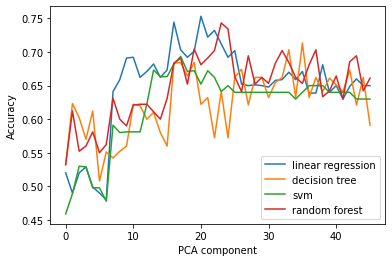

In [104]:
plt.plot(acc1[0],label='linear regression')
plt.plot(acc1[1],label='decision tree')
plt.plot(acc1[2],label='svm')
plt.plot(acc1[3],label='random forest')
plt.legend()
plt.xlabel('PCA component')
plt.ylabel('Accuracy')

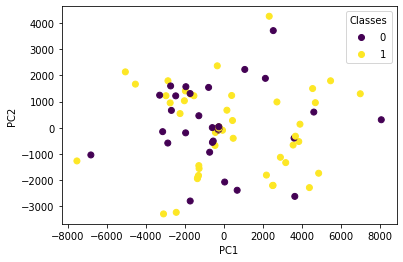

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Load data and labels

# Reshape data
data_2d = data.reshape(98, -1)

# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_2d)

# Plot results
fig, ax = plt.subplots()

# Color points by label
scatter = ax.scatter(data_pca[:,0], data_pca[:,1], c=target)

# # Add labels to points
# for i, txt in enumerate(range(len(data_pca))):
#     ax.annotate(txt, (data_pca[i,0], data_pca[i,1]))

# Add legend
handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Classes")

# Add axis labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

##Random forest

In [109]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN, Flatten,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Define the Scikit-learn models to be tested
scikit_models = [
    
    ('RandomForest', RandomForestClassifier())
]



# Loop over Scikit-learn models, train the model, and evaluate the model
model=RandomForestClassifier()

model.fit(data.reshape(98, -1), target)
y_pred = model.predict(data.reshape(98, -1))
acc = accuracy_score(target, y_pred)
print(name, acc)


RandomForest 1.0


In [111]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [14]:
inn=0
for i in range(len(target)):
  if target[i]==1:
    inn=inn+1

print(inn)

55
